# BIOS512 Assignment #4

🌬 For this assignment we are going to work with [Canada wind turbine](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/readme.md) data from TidyTuesday. 💨

Use `read_csv` to load the data from the TidyTuesday GitHub repository. The project URL is can be found at [https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/).

In [1]:
library("tidyverse")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
wind = read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-10-27/wind-turbine.csv",
                col_types = cols())

Each row in the table represents a single turbine.

Make a bar chart 📊 **sorted by frequency** of turbine count per province territory. (Hint: `fct_infreq` will sort your factor levels by frequency for subsequent plotting)

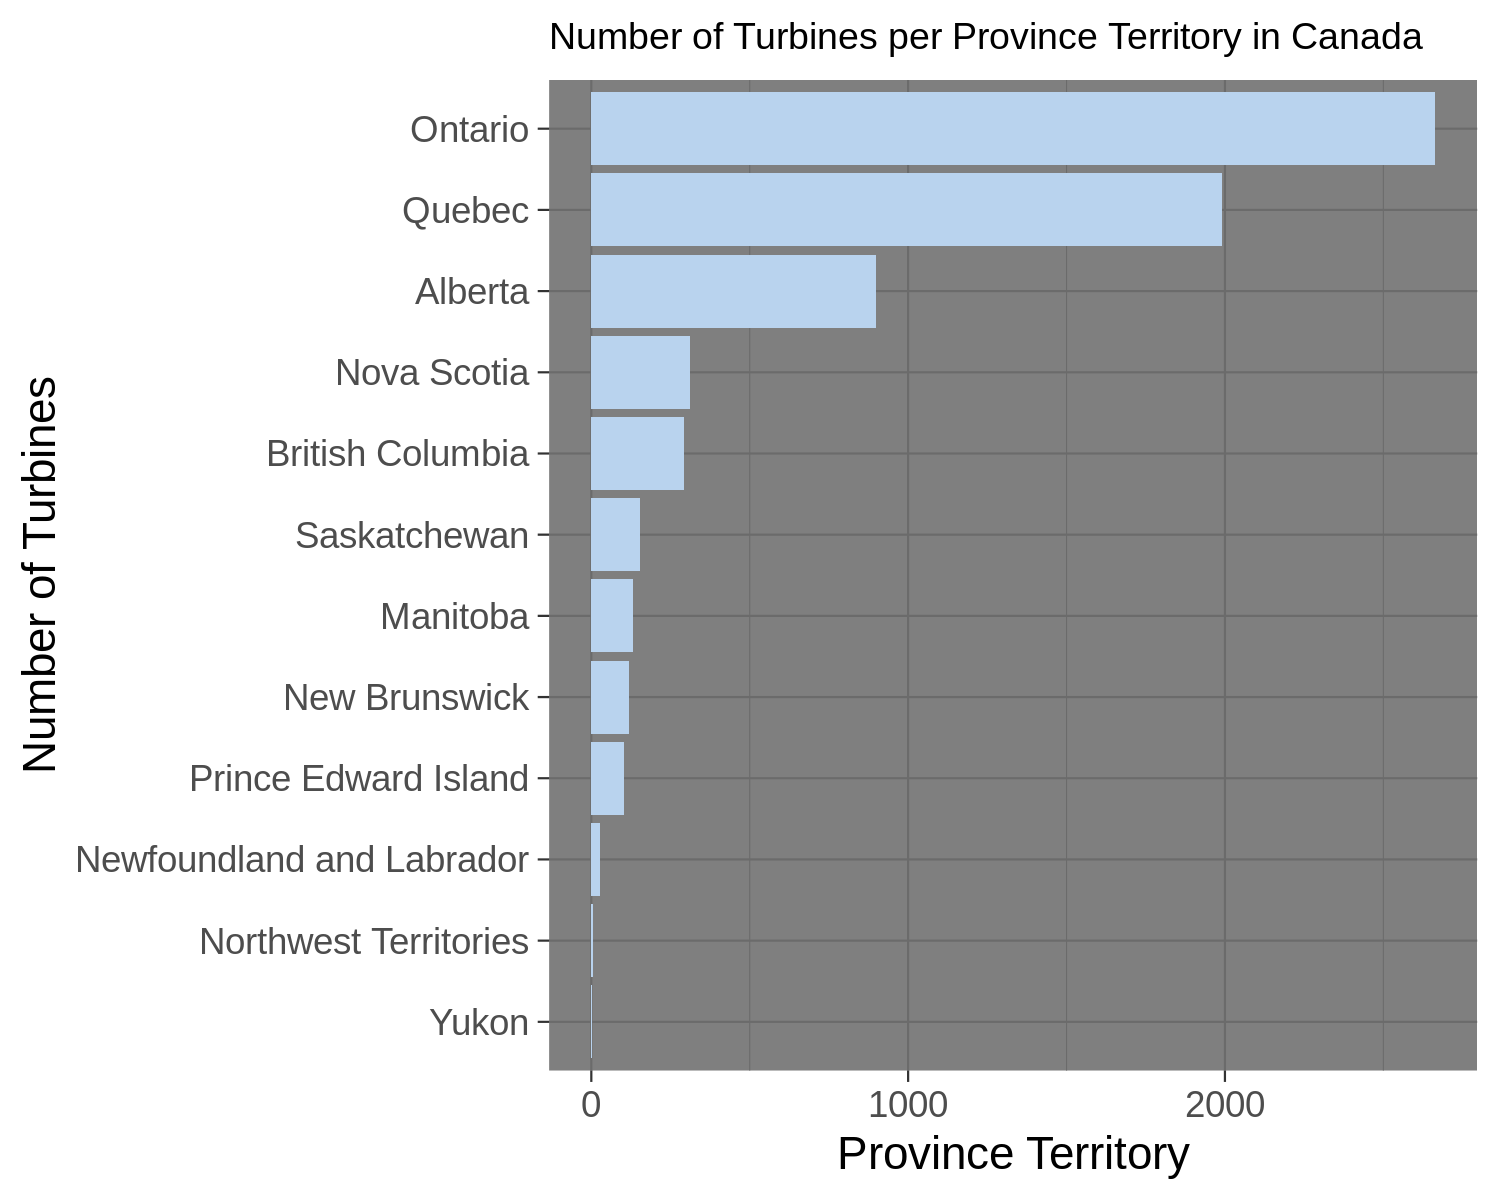

In [29]:
# creating new df with territory sorted by frequency (greatest to least)
wind_sorted = wind %>%
    mutate(territory_sorted = province_territory 
           %>% fct_infreq() 
           %>% fct_rev())  

p = ggplot(wind_sorted, aes(x = territory_sorted))

p = p + geom_bar(fill = "slategray2") + coord_flip()

#formatting
p = p + labs(x = "Number of Turbines", 
             y = "Province Territory",
             title = "Number of Turbines per Province Territory in Canada")
p = p + theme_dark()
p = p + theme(plot.title = element_text(size= 9))
p

Make a bar chart **sorted by frequency** of turbine count per manufacturer. **Group the low frequency manufacturers into an `Other` category**.

**Bonus:** Can you force the `Other` category to be the last bar? 

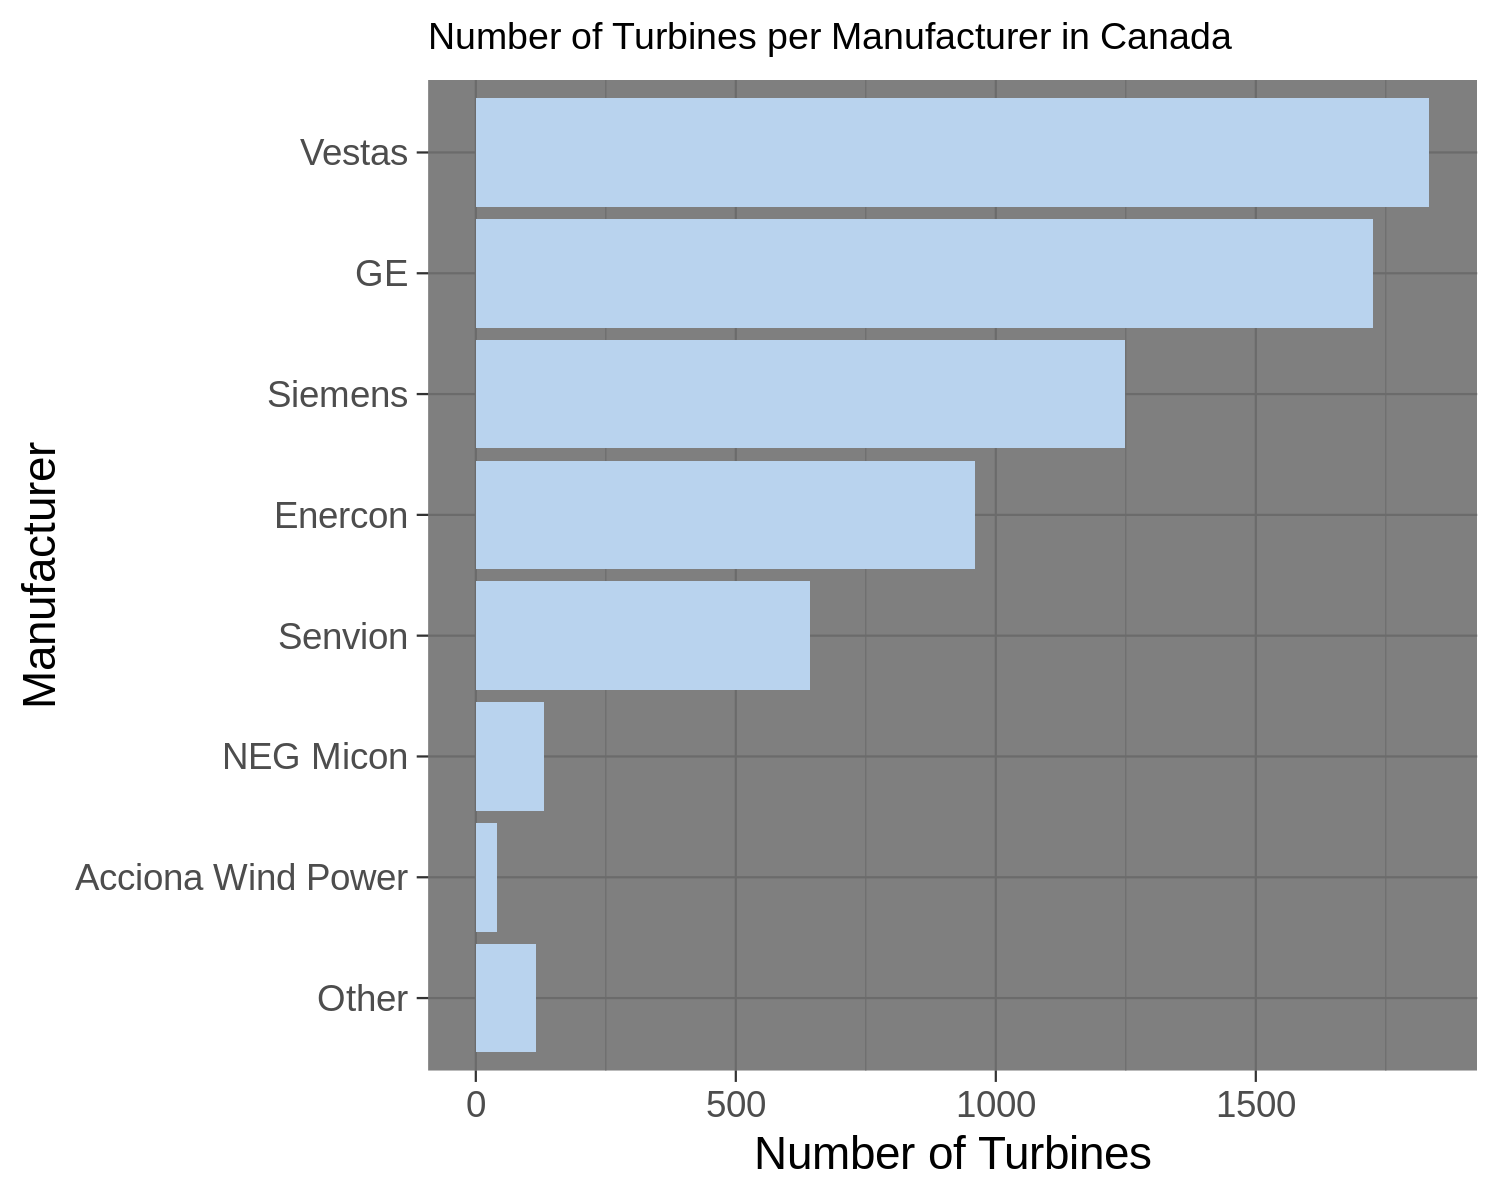

In [34]:
#making a new df, lumping the others (any manufacturer with least than 7 occurances) 
#then sorting by frequency and manually making Other the last bar 
# greatest to least
wind_lumped2 = wind %>%
    mutate(manu_lumped = manufacturer %>% 
           fct_lump(n = 7) %>% 
           fct_infreq() %>% 
           fct_relevel('Other', after= Inf) %>%
           fct_rev()
    )

p = ggplot(wind_lumped2, aes(y = manu_lumped))
p = p + geom_bar(fill = "slategray2")

#formatting
p = p + labs(x = "Number of Turbines", 
             y = "Manufacturer",
             title = "Number of Turbines per Manufacturer in Canada")
p = p + theme_dark()
p = p + theme(plot.title = element_text(size= 9))
p